In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
housing_df = pd.read_csv('data/kc_house_data.csv')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [104]:
housing_df.duplicated(subset=['id']).value_counts()

False    21420
True       177
dtype: int64

In [105]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

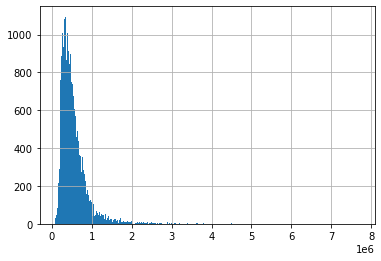

In [106]:
housing_df['price'].hist(bins = "auto")

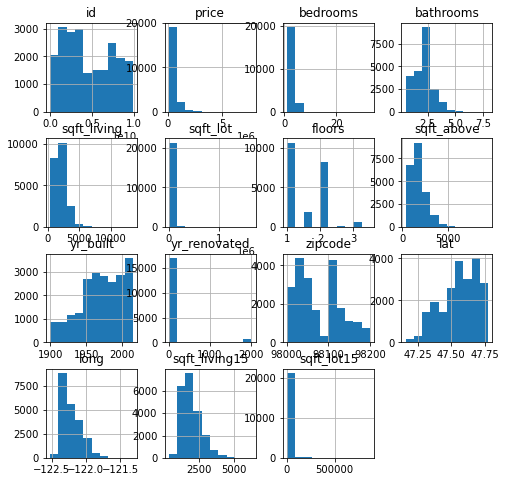

In [107]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
housing_df.hist(ax = ax);

<AxesSubplot:xlabel='zipcode', ylabel='price'>

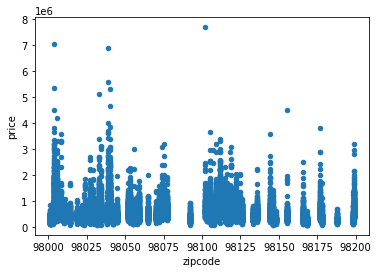

In [108]:
housing_df.plot.scatter('zipcode', 'price')

In [109]:
housing_pred = housing_df.drop(['price', 'lat', 'long', 'zipcode', 'sqft_above'], axis = 1)

In [110]:
housing_pred

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,0.0,1955,0.0,1340,5650
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,400.0,1951,1991.0,1690,7639
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,0.0,1933,NaN,2720,8062
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,910.0,1965,0.0,1360,5000
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,0.0,1987,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,0.0,2009,0.0,1530,1509
21593,6600060120,2/23/2015,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,0.0,2014,0.0,1830,7200
21594,1523300141,6/23/2014,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,0.0,2009,0.0,1020,2007
21595,291310100,1/16/2015,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,0.0,2004,0.0,1410,1287


In [111]:
housing_pred.isna().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_basement       0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

In [112]:
housing_pred.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [113]:
from sklearn.impute import SimpleImputer
wtr_col = housing_pred[['waterfront']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NO')
imputer.fit(wtr_col)
waterfront_imputed = imputer.transform(wtr_col)
waterfront_imputed

array([['NO'],
       ['NO'],
       ['NO'],
       ...,
       ['NO'],
       ['NO'],
       ['NO']], dtype=object)

In [114]:
housing_pred.waterfront = waterfront_imputed
housing_pred.waterfront.value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [115]:
from sklearn.preprocessing import OrdinalEncoder
wtr_col = housing_pred[['waterfront']]
encoder_wtr = OrdinalEncoder()
encoder_wtr.fit(wtr_col)
encoder_wtr.categories_[0]

array(['NO', 'YES'], dtype=object)

In [116]:
encoded_wtr = encoder_wtr.transform(wtr_col)
encoded_wtr = encoded_wtr.flatten()
housing_pred.waterfront = encoded_wtr
housing_pred.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [117]:
housing_pred.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [118]:
housing_pred.view.fillna('NONE', inplace =True)
housing_pred.view.value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [119]:
from sklearn.preprocessing import OneHotEncoder
view_ohe = housing_pred[['view']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(view_ohe)
ohe.categories_
view_encoded = ohe.transform(view_ohe)

In [120]:
view_encoded = pd.DataFrame(
    # Pass in NumPy array
    view_encoded,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=housing_pred.index
)


In [121]:
housing_pred.drop('view', axis = 1, inplace =True)

In [122]:
housing_pred = pd.concat([housing_pred, view_encoded], axis = 1)
housing_pred.rename(columns={"AVERAGE": "view_avg", "EXCELLENT": "view_excel", "FAIR": "view_fair", "GOOD": "view_good", "NONE": "view_no"}, inplace=True)
housing_pred.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,view_avg,view_excel,view_fair,view_good,view_no
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,0.0,Average,7 Average,0.0,1955,0.0,1340,5650,0.0,0.0,0.0,0.0,1.0
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0.0,Average,7 Average,400.0,1951,1991.0,1690,7639,0.0,0.0,0.0,0.0,1.0
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0.0,Average,6 Low Average,0.0,1933,NaN,2720,8062,0.0,0.0,0.0,0.0,1.0
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0.0,Very Good,7 Average,910.0,1965,0.0,1360,5000,0.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0.0,Average,8 Good,0.0,1987,0.0,1800,7503,0.0,0.0,0.0,0.0,1.0


In [123]:
housing_pred.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [96]:
from sklearn.preprocessing import OneHotEncoder
condition_ohe = housing_pred[['condition']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
cond_encoded_ohe = pd.DataFrame (ohe.fit_transform(condition_ohe))
cond_encoded_ohe.columns = ohe.get_feature_names(['condition'])
cond_encoded_ohe


,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21592,1.0,0.0,0.0,0.0,0.0
21593,1.0,0.0,0.0,0.0,0.0
21594,1.0,0.0,0.0,0.0,0.0
21595,1.0,0.0,0.0,0.0,0.0


In [124]:
housing_pred.drop('condition', axis = 1, inplace = True)
housing_pred = pd.concat([housing_pred, cond_encoded_ohe], axis = 1)
housing_pred.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,...,view_avg,view_excel,view_fair,view_good,view_no,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,0.0,7 Average,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0.0,7 Average,400.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0.0,6 Low Average,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0.0,7 Average,910.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0.0,8 Good,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [125]:
housing_pred.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [126]:
from sklearn.preprocessing import OneHotEncoder
floors_ohe = housing_pred[['floors']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
floors_encoded_ohe = pd.DataFrame (ohe.fit_transform(floors_ohe))
floors_encoded_ohe.columns = ohe.get_feature_names(['floors'])
floors_encoded_ohe

,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,1.0,0.0
21593,0.0,0.0,1.0,0.0,0.0,0.0
21594,0.0,0.0,1.0,0.0,0.0,0.0
21595,0.0,0.0,1.0,0.0,0.0,0.0


In [127]:
housing_pred.drop('floors', axis = 1, inplace = True)
housing_pred = pd.concat([housing_pred, floors_encoded_ohe], axis = 1)
housing_pred.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,grade,sqft_basement,yr_built,...,condition_Fair,condition_Good,condition_Poor,condition_Very Good,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,7129300520,10/13/2014,3,1.00,1180,5650,0.0,7 Average,0.0,1955,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,6414100192,12/9/2014,3,2.25,2570,7242,0.0,7 Average,400.0,1951,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5631500400,2/25/2015,2,1.00,770,10000,0.0,6 Low Average,0.0,1933,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,4,3.00,1960,5000,0.0,7 Average,910.0,1965,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2/18/2015,3,2.00,1680,8080,0.0,8 Good,0.0,1987,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [128]:
housing_pred.drop('floors_3.5', axis = 1, inplace =True)

In [133]:
housing_df['datetime'] = pd.to_datetime(housing_df['date'])

In [134]:
housing_df['soldyear'] = housing_df['datetime'].dt.year
housing_df['age_when_sold'] = housing_df['soldyear'] - housing_df['yr_built']

In [138]:
housing_df['grade_num'] = housing_df['grade'].str.split()
housing_df['grade_num'] = housing_df['grade_num'].str[0]
housing_df['grade_num'] = housing_df['grade_num'].astype(int)

In [141]:
housing_ols = housing_df.drop(['datetime', 'date', 'soldyear', 'yr_built', 'lat', 'long', 'zipcode', 'sqft_above', 'sqft_lot15', 'sqft_living15', 'grade'], axis = 1)

In [142]:
housing_ols.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_renovated,age_when_sold,grade_num
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,0.0,0.0,59,7
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,400.0,1991.0,63,7
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,0.0,NaN,82,6
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,910.0,0.0,49,7
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,0.0,0.0,28,8


In [146]:
from sklearn.impute import SimpleImputer
wtr_col = housing_ols[['waterfront']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NO')
imputer.fit(wtr_col)
waterfront_imputed = imputer.transform(wtr_col)
housing_ols.waterfront = waterfront_imputed

In [147]:
from sklearn.preprocessing import OrdinalEncoder
wtr_col = housing_ols[['waterfront']]
encoder_wtr = OrdinalEncoder()
encoder_wtr.fit(wtr_col)
encoder_wtr.categories_[0]
encoded_wtr = encoder_wtr.transform(wtr_col)
encoded_wtr = encoded_wtr.flatten()
housing_ols.waterfront = encoded_wtr
housing_ols.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_renovated,age_when_sold,grade_num
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,NONE,Average,0.0,0.0,59,7
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,NONE,Average,400.0,1991.0,63,7
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,NONE,Average,0.0,NaN,82,6
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,NONE,Very Good,910.0,0.0,49,7
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,NONE,Average,0.0,0.0,28,8
